<h1> Engineering Numerical Methods, AGH UST</h1>
<h3> Author: Tymoteusz Ciesielski </h3>
<h2> Lab 2 - Solving differential equations with implicit methods in the analysis of disease spreading model. </h2>
<h2> Picard iteration and Newton iteration </h2>

W zadaniu wyznaczać będziemy zachowanie się populacji w zależności od czasu. Rozpatrujemy grupy chorych i zdrowych oraz zależności między nimi i roznoszenie się choroby.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import fabs, sqrt

In [ ]:
<h3>Wyjściowe równ

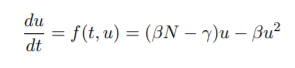

In [116]:
# częstość kontaktów osób zarażonych ze zdrowymi
beta = 0.001
#rozmiar populacji
N = 500
#średni czas trwania choroby
gamma = 0.1
#parametr alfa
alfa = beta * N - gamma
dt = 0.1
#rozpatrywany czas
t_0 = 0
t_max = 100
#Liczba zakażonych na początku
u_0 = 1
#tolerance for the stopping criteria
TOL = 1e-6
#numer iteracji
mi = 20

In [24]:
TOL

1e-06

<h1>1. Metoda Trapezów </h1>

<h2> Metoda trapezów z iteracją Picarda </h2>

In [98]:
t_tab = np.arange(t_0, t_max, dt)
u_tab = np.zeros(t_tab.size)
z_tab = np.zeros(t_tab.size)
u_tab[0] = u_0
z_tab[0] = N - u_0
#values of u, being iteratively improved. u for the previous iteration, and the current one
u_prev = u_0
u_next = u_0

for step in range(1, u_tab.size):
    u_prev = u_tab[step-1]
    u_next = u_tab[step-1]
    for iteration in range(0,mi+1):
        u_next = u_tab[step-1] + dt/2 * ( (alfa*u_tab[step-1] - beta*u_tab[step-1]**2) + (alfa*u_prev - beta*u_prev**2) )
        if fabs(u_next - u_prev) < TOL:
            break
        else:
            u_prev = u_next
    u_tab[step] = u_next
    z_tab[step] = N - u_next

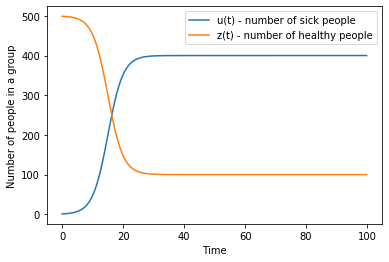

In [99]:
plt.plot(t_tab, u_tab, label="u(t) - number of sick people")
plt.plot(t_tab, z_tab, label="z(t) - number of healthy people")
plt.ylabel('Number of people in a group')
plt.xlabel('Time')
plt.legend()
plt.show()

<h2>Metoda trapezów z iteracją Newtona </h2>

In [103]:
u_tab = np.zeros(t_tab.size)
z_tab = np.zeros(t_tab.size)
u_tab[0] = u_0
z_tab[0] = N - u_0
u_prev = u_0
u_next = u_0

for step in range(1, u_tab.size):
    u_prev = u_tab[step-1]
    u_next = u_tab[step-1]
    for iteration in range(0,mi+1):
        u_next = u_prev - (u_prev - u_tab[step-1] - dt/2 * ( (alfa*u_tab[step-1] - beta*u_tab[step-1]**2) +(alfa*u_prev - beta*u_prev**2) )) \
        /(1 - dt/2*(alfa - 2*beta*u_prev))
        if fabs(u_next - u_prev) < TOL:
            break
        else:
            u_prev = u_next
    u_tab[step] = u_next
    z_tab[step] = N - u_next


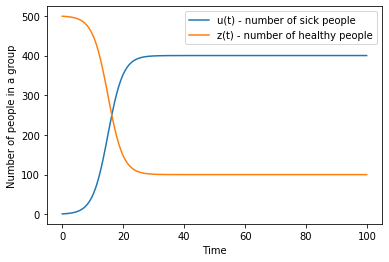

In [104]:
plt.plot(t_tab, u_tab, label="u(t) - number of sick people")
plt.plot(t_tab, z_tab, label="z(t) - number of healthy people")
plt.ylabel('Number of people in a group')
plt.xlabel('Time')
plt.legend()
plt.show()

<h1> 2. Niejawna metoda RK2 </h2>

In [114]:
#used to count the value of u, after using the corrector equation
def f_function(u):
    return (beta*N - gamma)*u - beta*u**2

In [136]:
u_tab = np.zeros(t_tab.size)
z_tab = np.zeros(t_tab.size)
u_tab[0] = u_0
z_tab[0] = N - u_0

#inicjalizujemy tablicę Butchera
c1 = 0.5 - sqrt(3)/6
c2 = 0.5 + sqrt(3)/6
b1 = 0.5
b2 = 0.5
a1_1 = 0.25
a1_2 = 0.25 - sqrt(3)/6
a2_1 = 0.25 + sqrt(3)/6
a2_2 = 0.25

m1_1 = 0
m1_2 = 0
m2_1 = 0
m2_2 = 0

deltaU1 = 0
deltaU2 = 0
#korzystamy z dwóch równań predykatora U1 i U2 które po wstawieniu do równania korektora dają rozwiązanie w chwili n+1
# U1 = 0
# U2 = 0
U1_prev = 0
U1_next = 0
U2_prev = 0
U2_next = 0
F1 = 0
F2 = 0

for step in range(1, u_tab.size):
    U1_prev = u_tab[step-1]
    U1_next = u_tab[step-1]
    U2_prev = u_tab[step-1]
    U2_next = u_tab[step-1]
    
    for iteration in range(0, mi+1):
        F1 = U1_prev - u_tab[step-1] - dt*( a1_1*(alfa*U1_prev-beta*U1_prev**2) + a1_2*(alfa*U2_prev - beta*U2_prev**2) )
        F2 = U1_prev - u_tab[step-1] - dt*( a2_1*(alfa*U1_prev-beta*U1_prev**2) + a2_2*(alfa*U2_prev - beta*U2_prev**2) )

        m1_1 = 1 - dt*a1_1*(alfa - 2*beta*U1_prev)
        m1_2 = -dt*a1_2*(alfa - 2*beta*U2_prev)
        m2_1 = -dt*a2_1*(alfa - 2*beta*U1_prev)
        m2_2 = 1 - dt*a2_2*(alfa - 2*beta*U2_prev)
        
        deltaU1 = (F2*m1_2 - F1*m2_2)/(m1_1*m2_2 - m1_2*m2_1)
        deltaU2 = (F1*m2_1 - F2*m1_1)/(m1_1*m2_2 - m1_2*m2_1)
        
        U1_next = U1_prev + deltaU1
        U2_next = U2_prev + deltaU2
        if fabs(U1_next - U1_prev)<TOL and fabs(U2_next - U2_prev)<TOL:
            break
        else:
            U1_prev = U1_next
            U2_prev = U2_next
            
    u_tab[step] = u_tab[step-1] + dt*(b1*f_function(U1_next) + b2*f_function(U2_next))
    z_tab[step] = N - u_tab[step-1]

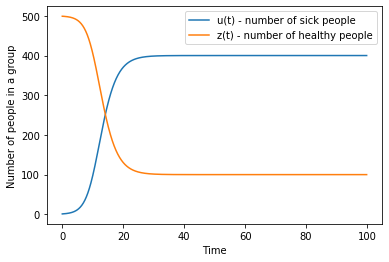

In [135]:
plt.plot(t_tab, u_tab, label="u(t) - number of sick people")
plt.plot(t_tab, z_tab, label="z(t) - number of healthy people")
plt.ylabel('Number of people in a group')
plt.xlabel('Time')
plt.legend()
plt.show()